In [45]:
# Bitcoin Data Analysis and Price Prediction
# March 2, 2025

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import warnings
warnings.filterwarnings('ignore')

In [46]:
# Set plot style
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# Display upload widget if running in Colab
try:
    from google.colab import files
    uploaded = files.upload()  # This will prompt user to upload the file
    file_name = list(uploaded.keys())[0]
except:
    # If not running in Colab, use a local file path
    file_name = 'BTC_All_graph_coinmarketcap.csv'

# Read the data with appropriate separator
df = pd.read_csv(file_name, sep=';')

Saving BTC_All_graph_coinmarketcap.csv to BTC_All_graph_coinmarketcap.csv


In [47]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

# Set timestamp as index
df.set_index('timestamp', inplace=True)

In [48]:

# Remove quotes from numeric columns
numeric_columns = ['open', 'high', 'low', 'close', 'volume', 'marketCap']
for col in numeric_columns:
    df[col] = df[col].astype(str).str.replace('"', '').astype(float)

# Display basic information
print("Bitcoin Data Overview:")
print(f"Date range: {df.index.min()} to {df.index.max()}")
print(f"Number of months: {len(df)}")

# Display the first few rows
print("\nFirst few rows of data:")
display(df.head())

# Basic statistics
print("\nStatistical Summary:")
display(df.describe())

Bitcoin Data Overview:
Date range: 2025-03-01 00:00:00 to 2025-03-01 00:00:00
Number of months: 144

First few rows of data:


,name,open,high,low,close,volume,marketCap
timestamp,,,,,,,
NaT,2823,2.828177e+06,3.069225e+06,2.749001e+06,2.892590e+06,0.0,3.224944e+13
NaT,2823,2.892590e+06,2.911111e+06,1.653981e+06,2.707710e+06,0.0,3.013018e+13
NaT,2823,2.703827e+06,2.724082e+06,1.858500e+06,2.045318e+06,0.0,2.302514e+13
NaT,2823,2.064287e+06,2.353812e+06,1.391117e+06,2.242743e+06,0.0,2.580153e+13
NaT,2823,2.245343e+06,2.975597e+06,2.145673e+06,2.858592e+06,0.0,3.328857e+13



Statistical Summary:


,name,open,high,low,close,volume,marketCap
count,144.0,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02
mean,2823.0,4.408042e+08,5.124681e+08,3.847209e+08,4.560800e+08,9.642342e+15,8.411300e+15
std,0.0,5.811916e+08,6.593284e+08,5.189813e+08,5.981649e+08,1.419849e+16,1.139158e+16
min,2823.0,2.064287e+06,2.353812e+06,1.391117e+06,2.045318e+06,0.000000e+00,0.000000e+00
25%,2823.0,1.348781e+07,1.548576e+07,1.118202e+07,1.361713e+07,1.345829e+12,1.915014e+14
50%,2823.0,1.869192e+08,2.215573e+08,1.476531e+08,1.960136e+08,2.392913e+14,3.318814e+15
75%,2823.0,6.874851e+08,7.441695e+08,6.154270e+08,6.989439e+08,2.027116e+16,1.333119e+16
max,2823.0,2.568262e+09,2.759957e+09,2.327441e+09,2.568318e+09,6.000966e+16,5.171919e+16


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

ARIMA Model Performance:
RMSE: 200604331.24
MAE: 146460395.36
R²: 0.9074
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


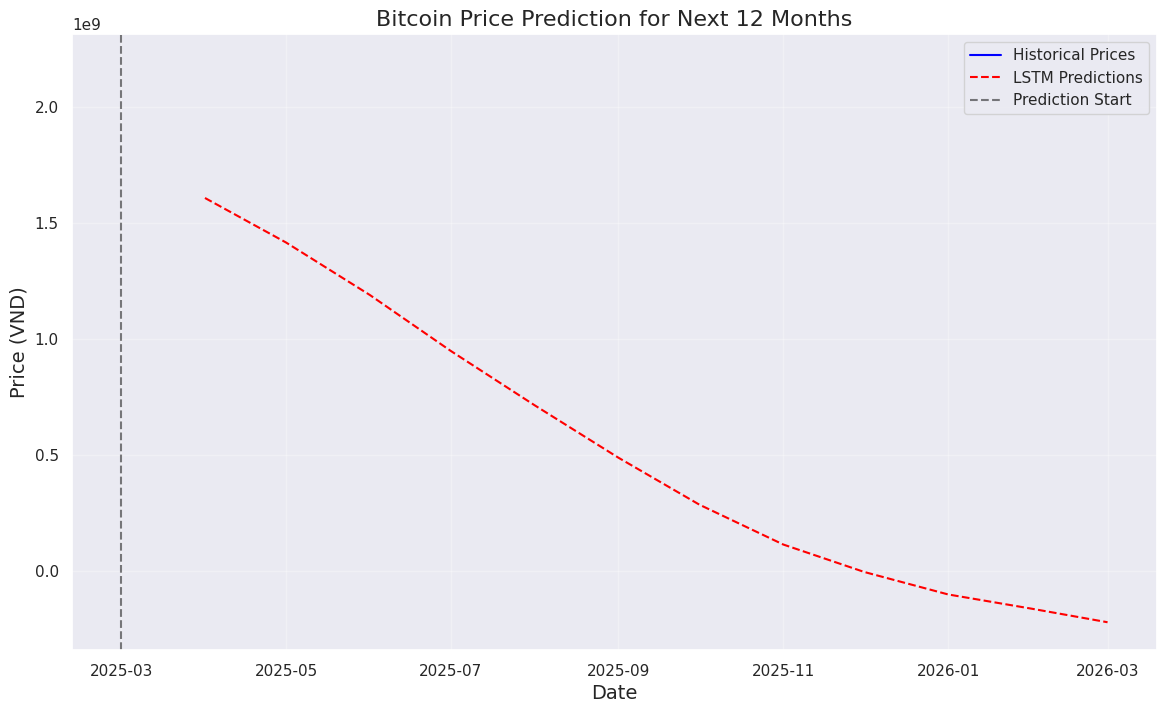


Bitcoin Price Predictions for Next 12 Months:


,Date,Predicted_Price
0,2025-04-01,1.607883e+09
1,2025-05-01,1.415863e+09
2,2025-06-01,1.189662e+09
3,2025-07-01,9.480187e+08
4,2025-08-01,7.139453e+08
5,2025-09-01,4.878999e+08
6,2025-10-01,2.851604e+08
7,2025-11-01,1.135427e+08
8,2025-12-01,-4.987836e+06
9,2026-01-01,-1.017407e+08


In [62]:
# Price Prediction Models

# Prepare data
df_model = df[['close']].copy()

# Function to create dataset for time series prediction
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_model)

# Split data into training and testing sets (80% training, 20% testing)
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size:len(scaled_data), :]

# Define time step for prediction (e.g., using 12 months to predict next month)
time_step = 12
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input for LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_inv = scaler.inverse_transform([y_train])
y_test_inv = scaler.inverse_transform([y_test])

# Calculate performance metrics
lstm_train_rmse = np.sqrt(mean_squared_error(y_train_inv[0], train_predict[:, 0]))
lstm_test_rmse = np.sqrt(mean_squared_error(y_test_inv[0], test_predict[:, 0]))
lstm_train_mae = mean_absolute_error(y_train_inv[0], train_predict[:, 0])
lstm_test_mae = mean_absolute_error(y_test_inv[0], test_predict[:, 0])
lstm_train_r2 = r2_score(y_train_inv[0], train_predict[:, 0])
lstm_test_r2 = r2_score(y_test_inv[0], test_predict[:, 0])


# ARIMA model
arima_model = ARIMA(df_model['close'].dropna(), order=(5, 1, 0))
arima_result = arima_model.fit()

# Make predictions
arima_predictions = arima_result.predict(start=train_size, end=len(df_model)-1, typ='levels')

# Calculate ARIMA metrics
arima_rmse = np.sqrt(mean_squared_error(df_model['close'].iloc[train_size:], arima_predictions))
arima_mae = mean_absolute_error(df_model['close'].iloc[train_size:], arima_predictions)
arima_r2 = r2_score(df_model['close'].iloc[train_size:], arima_predictions)

print("\nARIMA Model Performance:")
print(f"RMSE: {arima_rmse:.2f}")
print(f"MAE: {arima_mae:.2f}")
print(f"R²: {arima_r2:.4f}")

# Future Price Prediction

# Create sequence for future prediction using LSTM
last_sequence = scaled_data[-time_step:]
last_sequence = last_sequence.reshape(1, time_step, 1)

# Predict future values
num_future_points = 12  # Predict 12 months ahead
future_predictions = []

# Recursively predict future values
current_batch = last_sequence
for i in range(num_future_points):
    future_price = model.predict(current_batch)[0]
    future_predictions.append(future_price)
    current_batch = np.append(current_batch[:, 1:, :], [[future_price]], axis=1)

# Convert predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=num_future_points, freq='MS')

# Plot future predictions
plt.figure(figsize=(14, 8))
plt.title('Bitcoin Price Prediction for Next 12 Months', fontsize=16)
plt.plot(df.index, df['close'], label='Historical Prices', color='blue')
plt.plot(future_dates, future_predictions, label='LSTM Predictions', color='red', linestyle='--')
plt.axvline(x=last_date, color='black', linestyle='--', alpha=0.5, label='Prediction Start')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (VND)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Create future prediction dataframe
future_pred_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': future_predictions.flatten()
})

print("\nBitcoin Price Predictions for Next 12 Months:")
display(future_pred_df)

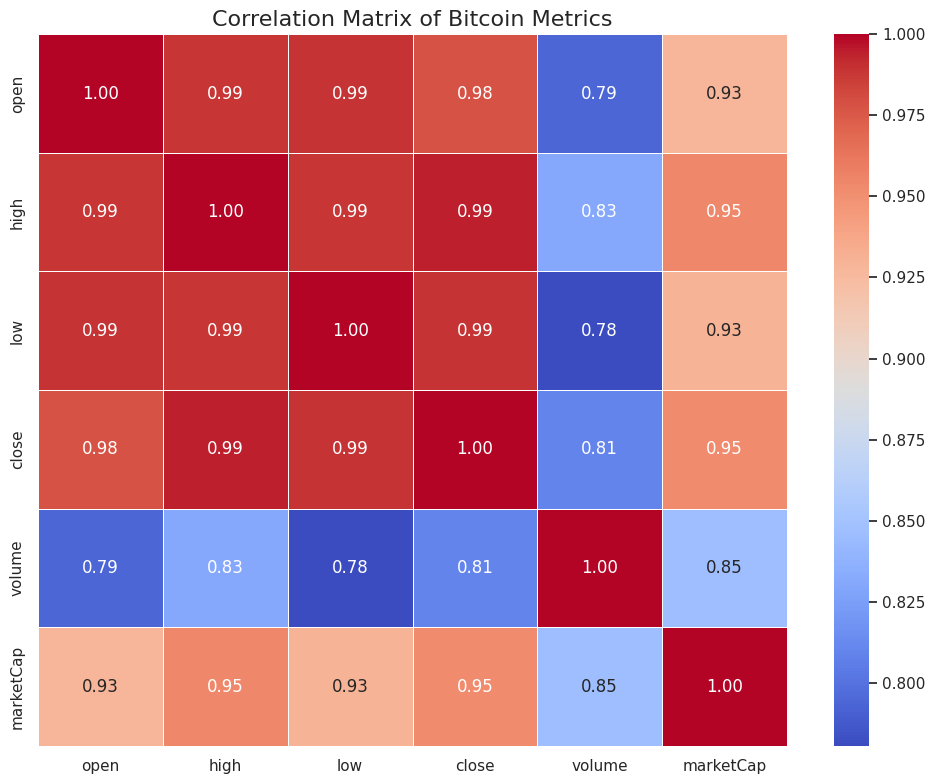

In [57]:
# Additional Correlation Analysis

# Calculate correlation between different metrics
correlation_columns = ['open', 'high', 'low', 'close', 'volume', 'marketCap']
correlation_matrix = df[correlation_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Bitcoin Metrics', fontsize=16)
plt.tight_layout()
plt.show()

In [55]:
print("\n============== Bitcoin Analysis Summary ==============")
print(f"Historical price range: ${df['low'].min():.2f} - ${df['high'].max():.2f}")
print(f"Current price (as of {df.index[-1].strftime('%Y-%m-%d')}): ${df['close'].iloc[-1]:.2f}")
print(f"All-time average price: ${df['close'].mean():.2f}")
print(f"Correlation between price and volume: {df['close'].corr(df['volume']):.2f}")
print(f"Predicted price in 12 months: ${future_predictions[-1][0]:.2f}")
print(f"Projected 12-month growth: {(future_predictions[-1][0]/df['close'].iloc[-1] - 1) * 100:.2f}%")
print("====================================================")


============== Bitcoin Analysis Summary ==============
Historical price range: $1391117.00 - $2759956660.50
Current price (as of 2025-03-01): $2193173572.08
All-time average price: $456080028.78
Correlation between price and volume: 0.81
Predicted price in 12 months: $-441323328.00
Projected 12-month growth: -120.12%
